# 지하철 이용객 분석
- https://data.busan.go.kr/
- 승하차 인원정보 검색
- 일별역별시간별승하차 파일 받기
- 최신 csv 파일로 받기</br>
- 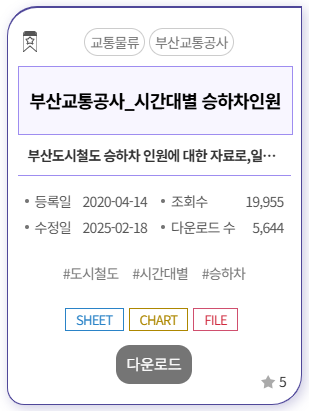

In [1]:
import pandas as pd
file_path ="./data ref/일별역별시간대별승하차인원(2025년1월).csv"
data = pd.read_csv(file_path,encoding="EUC-KR")
data.head() # 맨 앞 데이터 5개 가져오기
# data.tail()  # 끝 데이터 !

,역번호,역명,년월일,요일,구분,합계,01시-02시,02시-03시,03시-04시,04시-05시,...,15시-16시,16시-17시,17시-18시,18시-19시,19시-20시,20시-21시,21시-22시,22시-23시,23시-24시,24시-01시
0,95,다대포해수욕장,2025-01-01,수,승차,8126,0,1,0,14,...,527,498,517,266,170,98,79,38,10,0
1,95,다대포해수욕장,2025-01-01,수,하차,7674,0,1,0,0,...,376,357,295,185,132,81,74,50,71,46
2,95,다대포해수욕장,2025-01-02,목,승차,4893,1,0,0,21,...,472,364,373,210,159,87,90,57,13,0
3,95,다대포해수욕장,2025-01-02,목,하차,3965,1,4,0,1,...,311,339,296,321,239,143,99,92,82,49
4,95,다대포해수욕장,2025-01-03,금,승차,4572,0,0,0,27,...,401,300,363,237,139,102,70,69,13,0


In [2]:
# 표 열 이름 영어로 바꾸기 !!
columns = ['num','name','date','week','type','total']
time_col = [f"{i}~{i+1}H" for i in range(1,24)]
# time_col = ['1h-2h','2h-3h']
columns =columns + time_col+['24~01H']
data.columns = columns
data = data.loc[:,:'total']

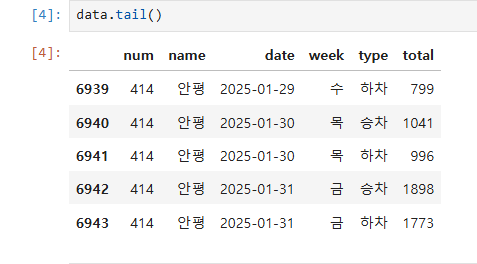

In [3]:
data.head()

,num,name,date,week,type,total
0,95,다대포해수욕장,2025-01-01,수,승차,8126
1,95,다대포해수욕장,2025-01-01,수,하차,7674
2,95,다대포해수욕장,2025-01-02,목,승차,4893
3,95,다대포해수욕장,2025-01-02,목,하차,3965
4,95,다대포해수욕장,2025-01-03,금,승차,4572


In [4]:
# 더블 클릭해서 '누르면 '를 씌울 수 있음 !!

In [5]:
data1 = data.groupby(['num','name','date']).sum().reset_index()  # 같은 것은 같이 처리하고, index도 다시 붙여줌 ~
# data1[data1['date']=='2025-01-01'] 1월 1일 날짜만 필터링해서 보여줌 !
data1

,num,name,date,week,type,total
0,95,다대포해수욕장,2025-01-01,수수,승차하차,15800
1,95,다대포해수욕장,2025-01-02,목목,승차하차,8858
2,95,다대포해수욕장,2025-01-03,금금,승차하차,8279
3,95,다대포해수욕장,2025-01-04,토토,승차하차,8477
4,95,다대포해수욕장,2025-01-05,일일,승차하차,6912
...,...,...,...,...,...,...
3467,414,안평,2025-01-27,월월,승차하차,2716
3468,414,안평,2025-01-28,화화,승차하차,1987
3469,414,안평,2025-01-29,수수,승차하차,1633
3470,414,안평,2025-01-30,목목,승차하차,2037


In [6]:
# 오 베이비 월화수목금토일 난 널 항상 애타게 불러~ 날 숨쉬게 하는 너의 에너지~ 너는 나의 에너지~

In [7]:
gdata = data1[['name','date','total']]
gdata = gdata.sort_values(by=['name','date'],ascending=[False,True])  # 데이터를 수정해서 덮어쓸 때는 조심하자~ ; by = [] 안에 정렬하고 싶은 항목을 넣으면 됨 !
gdata.head(10)

,name,date,total
2294,화명,2025-01-01,10496
2295,화명,2025-01-02,21620
2296,화명,2025-01-03,22837
2297,화명,2025-01-04,16462
2298,화명,2025-01-05,10916
2299,화명,2025-01-06,22558
2300,화명,2025-01-07,21776
2301,화명,2025-01-08,22369
2302,화명,2025-01-09,20696
2303,화명,2025-01-10,21045


In [8]:
mdata = gdata.groupby(by="name").sum().reset_index()
tdata = mdata[['name','total']] # 항목이 두 개이면 안되니까, 리스트로 묶어줌 !!
tdata

,name,total
0,가야,194925
1,감전,211937
2,강서구청,140162
3,개금,442819
4,거제,313595
...,...,...
103,토성,436698
104,하단,1003733
105,해운대,803371
106,호포,67287


In [53]:
sdata = tdata.sort_values(by='total', ascending=False)
sdata.head(20)
total_data = sdata[:20]
total_data

,name,total
70,서면,3626209
83,연산,1500575
61,부산역,1337149
65,사상,1230792
36,동래,1089751
72,센텀시티,1083780
88,자갈치,1070458
23,남포,1045512
64,부전,1008329
104,하단,1003733


In [13]:
# 폰트 추가하기~
import matplotlib
import matplotlib.pyplot as plt
import matplotlib.font_manager as fm

d2_path ="./data ref/D2Coding-Ver1.3.2-20180524.ttf"
fm.fontManager.addfont(d2_path)
plt.rcParams["font.family"] = "D2Coding"

In [15]:
# 윈도우에 폰트 추가하기 ~
# for font in fm.findSystemFonts():
#     print(font)
# print(plt.rcParams["font.family"])

In [17]:
#!pip install squarify

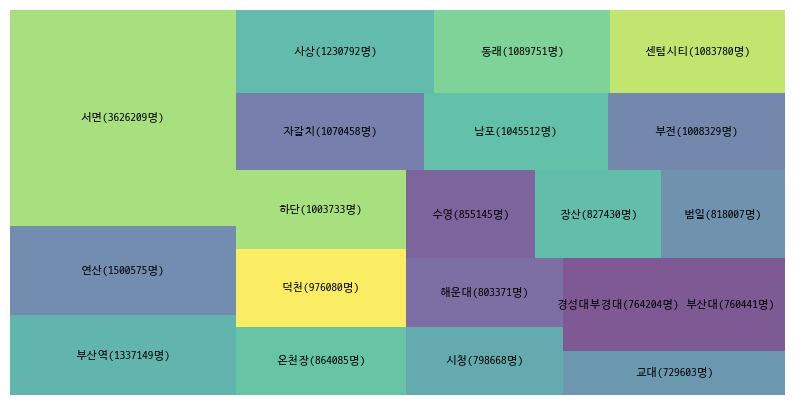

In [58]:
import squarify
plt.figure(figsize=(10,5))
squarify.plot(sizes=total_data['total'], label= [f"{x[0]}({x[1]}명)" for x in zip(total_data['name'],total_data['total'])], alpha= 0.7)  # alpha는 투명도~
plt.rcParams['font.size']=8
# plt.rcParams['text.color']='black'
plt.gca().invert_yaxis() # 축 뒤집기~
plt.axis("off")  # 축 인덱스 없애기~
plt.show()

In [ ]:
### 팀별 과제 ###

In [68]:
import pandas as pd
file_path ="./data ref/대구교통공사_역별일별시간별승하차인원현황_20250131.csv"
data = pd.read_csv(file_path,encoding="EUC-KR")
data.head(2)

,월,일,역번호,역명,승하차,05시-06시,06시-07시,07시-08시,08시-09시,09시-10시,...,15시-16시,16시-17시,17시-18시,18시-19시,19시-20시,20시-21시,21시-22시,22시-23시,23시-24시,일계
0,1,1,1150,설화명곡,승차,50,40,78,104,144,...,188,168,170,136,79,76,38,23,8,2339
1,1,1,1150,설화명곡,하차,2,99,48,74,69,...,170,160,211,193,131,133,112,88,85,2140


In [60]:
columns = ['month','day','num','name','type']
time_col = [f"{i}~{i+1}H" for i in range(5,24)]
# time_col = ['1h-2h','2h-3h']
columns =columns + time_col + ['total']
data.columns = columns
data = data.loc[:,:'total']

In [61]:
data.head(5)

,month,day,num,name,type,5~6H,6~7H,7~8H,8~9H,9~10H,...,15~16H,16~17H,17~18H,18~19H,19~20H,20~21H,21~22H,22~23H,23~24H,total
0,1,1,1150,설화명곡,승차,50,40,78,104,144,...,188,168,170,136,79,76,38,23,8,2339
1,1,1,1150,설화명곡,하차,2,99,48,74,69,...,170,160,211,193,131,133,112,88,85,2140
2,1,1,1160,화원,승차,26,42,47,103,152,...,308,271,195,105,89,38,42,30,7,2811
3,1,1,1160,화원,하차,5,71,46,83,141,...,292,251,155,154,121,120,85,77,74,2830
4,1,1,1170,대곡,승차,23,48,70,119,162,...,179,182,161,132,83,81,41,36,8,2426


In [62]:
data1 = data.groupby(['num','month','day','name']).sum().reset_index()
data1

,num,month,day,name,type,5~6H,6~7H,7~8H,8~9H,9~10H,...,15~16H,16~17H,17~18H,18~19H,19~20H,20~21H,21~22H,22~23H,23~24H,total
0,1150,1,1,설화명곡,승차하차,52,139,126,178,213,...,358,328,381,329,210,209,150,111,93,4479
1,1150,1,2,설화명곡,승차하차,71,238,651,757,501,...,570,650,754,845,396,275,238,190,95,8866
2,1150,1,3,설화명곡,승차하차,76,227,612,850,549,...,613,646,726,911,452,319,311,235,161,9399
3,1150,1,4,설화명곡,승차하차,62,170,264,401,449,...,521,605,557,495,306,298,279,210,138,7543
4,1150,1,5,설화명곡,승차하차,37,103,123,239,303,...,463,446,438,340,227,214,184,101,82,5407
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2909,3410,1,27,용지,승차하차,21,98,136,193,261,...,279,307,261,231,99,73,83,78,48,3692
2910,3410,1,28,용지,승차하차,16,56,85,117,164,...,196,184,141,159,95,69,66,52,26,2395
2911,3410,1,29,용지,승차하차,13,40,35,92,83,...,152,143,107,127,70,76,55,36,32,1664
2912,3410,1,30,용지,승차하차,14,23,52,57,97,...,191,206,199,159,115,67,68,57,59,2259


In [64]:
gdata = data1[['name','month','day','total']]
gdata = gdata.sort_values(by=['name','day'],ascending=[True,False])
gdata.head(10)

,name,month,day,total
960,각산,1,31,8387
959,각산,1,30,4356
958,각산,1,29,2659
957,각산,1,28,3797
956,각산,1,27,5771
955,각산,1,26,5340
954,각산,1,25,6931
953,각산,1,24,9502
952,각산,1,23,8735
951,각산,1,22,8356


In [65]:
mdata = gdata.groupby(by="name").sum().reset_index()
tdata = mdata[['name','total']]
tdata

,name,total
0,각산,220315
1,감삼,355648
2,강창,287943
3,건들바위,90492
4,경대병원,360447
...,...,...
89,학정,18176
90,해안,135095
91,현충로,168520
92,화원,218548


In [66]:
sdata = tdata.sort_values(by='total', ascending=False)
sdata.head(20)
total_data = sdata[:20]
total_data

,name,total
38,반월당2,1237305
24,동대구역,1056787
76,중앙로,914031
37,반월당1,650779
45,상인,582605
17,대구역,456205
78,진천,443825
47,서부정류장,439476
41,범어,414089
4,경대병원,360447


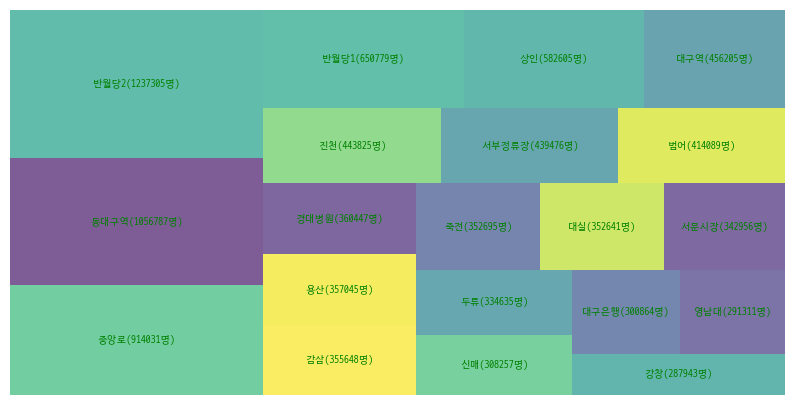

In [95]:
import squarify
plt.figure(figsize=(10,5))
squarify.plot(sizes=total_data['total'], label= [f"{x[0]}({x[1]}명)" for x in zip(total_data['name'],total_data['total'])], alpha = 0.7)
plt.rcParams['font.size']=7
plt.rcParams['text.color']='green'
plt.gca().invert_yaxis()
plt.axis("off") 
plt.show()